- Muhammad Hamza 
- 2330-0068
- BS-AI


# **LAB ACTIVITY**

# FORWARD / BACKWARD PROPAGATION

In [3]:
import numpy as np


# Sigmoid function.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# MSE loss function to calculate loss.
def loss(y_hat_1, y1, y_hat_2, y2):
    return 1/2 * ((y_hat_1 - y1)**2 + (y_hat_2 - y2)**2)

# Initial assumptions.
weights = (0.12, 0.16, 0.2, 0.24, 0.28, 0.32, 0.36, 0.4)
bias = (0.5, 0.6)
inputs = (0.04, 0.08)  # Features
y_values = (0.15, 0.85)  # Outputs

                                     # Forward propagation function.

def forward_propagation(inputs, weights, bias, y_values):
    # Assign every variable using assumption lists.
    w1, w2, w3, w4, w5, w6, w7, w8 = weights
    b1, b2 = bias
    i1, i2 = inputs
    y1, y2 = y_values

    # Finding first hidden layer and its state after entering sigmoid.
    h1 = i1 * w1 + i2 * w3 + b1
    h1_out = sigmoid(h1)

    # Finding second hidden layer and its state after entering sigmoid.
    h2 = i1 * w2 + i2 * w4 + b1
    h2_out = sigmoid(h2)

    # Finding the first output layer and its state after entering sigmoid.
    o1 = h1_out * w5 + h2_out * w7 + b2
    o1_out = sigmoid(o1)

    # Finding the second output layer and its state after entering sigmoid.
    o2 = h1_out * w6 + h2_out * w8 + b2
    o2_out = sigmoid(o2)

    # Print out calculated values.
    print("\n\t-Forward Propagation-")
    print("\nh1: ", h1, "\th1_out: ", h1_out.round(5))
    print("h2: ", h2, "\th2_out: ", h2_out.round(5))
    print("o1: ", o1, "\to1_out: ", o1_out.round(5))
    print("o2: ", o2, "\to2_out: ", o2_out.round(5))
    print("\nCurrent Loss: ", loss(o1_out, y1, o2_out, y2).round(5))

    hidden_layers = (h1_out, h2_out)
    output_layers = (o1_out, o2_out)

    return hidden_layers, output_layers

                                            # Backpropagation function.

def backward_propagation(inputs, weights, bias, y_values, hidden_layers, output_layers):
    w1, w2, w3, w4, w5, w6, w7, w8 = weights
    b1, b2 = bias
    i1, i2 = inputs
    y1, y2 = y_values

    # The hidden layers we calculate in the forward feed.
    h1_out, h2_out = hidden_layers
    # The output values that we calculate in the forward feed.
    o1_out, o2_out = output_layers

    lr = 0.5  # Learning rate.

    # Update weights using gradient descent.
    new_w5 = w5 - lr * (-(y1 - o1_out) * o1_out * (1 - o1_out) * h1_out)
    new_w7 = w7 - lr * (-(y1 - o1_out) * o1_out * (1 - o1_out) * h2_out)
    new_w6 = w6 - lr * (-(y2 - o2_out) * o2_out * (1 - o2_out) * h1_out)
    new_w8 = w8 - lr * (-(y2 - o2_out) * o2_out * (1 - o2_out) * h2_out)
    new_w1 = w1 - lr * (-(y1 - h1_out) * h1_out * (1 - h1_out) * i1)
    new_w3 = w3 - lr * (-(y1 - h1_out) * h1_out * (1 - h1_out) * i2)
    new_w2 = w2 - lr * (-(y2 - h2_out) * h2_out * (1 - h2_out) * i1)
    new_w4 = w4 - lr * (-(y2 - h2_out) * h2_out * (1 - h2_out) * i2)

    # Printing the values calculated from back propagation.
    print("\n\t-Backward Propagation-")
    print("\n")
    print("old w1: ", w1, "\tnew w1: ", new_w1.round(5))
    print("old w2: ", w2, "\tnew w2: ", new_w2.round(5))
    print("old w3: ", w3, "\tnew w3: ", new_w3.round(5))
    print("old w4: ", w4, "\tnew w4: ", new_w4.round(5))
    print("old w5: ", w5, "\tnew w5: ", new_w5.round(5))
    print("old w6: ", w6, "\tnew w6: ", new_w6.round(5))
    print("old w7: ", w7, "\tnew w7: ", new_w7.round(5))
    print("old w8: ", w8, "\tnew w8: ", new_w8.round(5))

    return new_w1, new_w2, new_w3, new_w4, new_w5, new_w6, new_w7, new_w8

# Run forward and backward propagation.
hidden_layers, output_layers = forward_propagation(inputs, weights, bias, y_values)
weights = backward_propagation(inputs, weights, bias, y_values, hidden_layers, output_layers)

# Decide whether to perform another step.
decision = input("Please push Y in order to calculate one more step.\n")
if decision.lower() == 'y':
    forward_propagation(inputs, weights, bias, y_values)



	-Forward Propagation-

h1:  0.5208 	h1_out:  0.62733
h2:  0.5256 	h2_out:  0.62846
o1:  1.0018980153813142 	o1_out:  0.73143
o2:  1.052129659881758 	o2_out:  0.74118

Current Loss:  0.17495

	-Backward Propagation-


old w1:  0.12 	new w1:  0.11777
old w2:  0.16 	new w2:  0.16103
old w3:  0.2 	new w3:  0.19554
old w4:  0.24 	new w4:  0.24207
old w5:  0.28 	new w5:  0.24417
old w6:  0.32 	new w6:  0.32655
old w7:  0.36 	new w7:  0.32411
old w8:  0.4 	new w8:  0.40656
Please push Y in order to calculate one more step.
y

	-Forward Propagation-

h1:  0.5203536235083552 	h1_out:  0.62723
h2:  0.5258069209127755 	h2_out:  0.6285
o1:  0.9568581417894062 	o1_out:  0.72249
o2:  1.0603449781084515 	o2_out:  0.74276

Current Loss:  0.16962


# **ANN KERAS :**

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

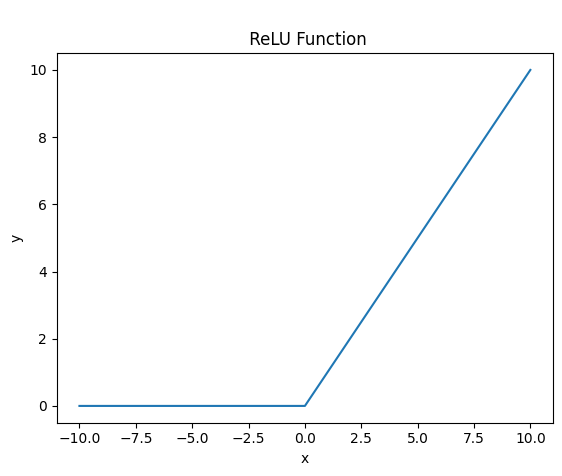

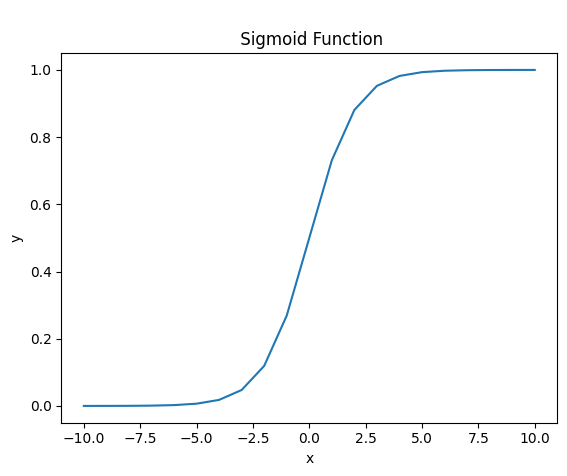

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 6)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7916 - loss: 0.5807
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7987 - loss: 0.4576
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7984 - loss: 0.4296
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8071 - loss: 0.4226
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8273 - loss: 0.3906
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8411 - loss: 0.3836
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8426 - loss: 0.3751
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8534 - loss: 0.3518
Epoch 9/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8538 - loss: 0.3516
Epoch 10/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8588 - loss: 0.3507
Epoch 11/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8629 - loss: 0.3385
Epoch 12/100
800/800 ━━━━━━━━━━━━━━━

<ipython-input-12-3256e3bd7284>:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + ['Not Churn', 'Churn'])
<ipython-input-12-3256e3bd7284>:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + ['Not Churn', 'Churn'])


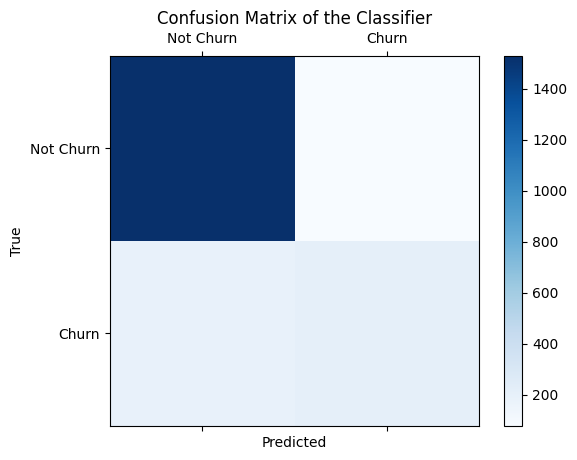

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import math
import keras
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
df = pd.read_csv("/content/sample_data/Churn_Modelling.csv")
print(df.head())

# Feature matrix and target variable
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

# Encoding categorical variables
cat = [1, 2]
cat_cols = pd.get_dummies(X.iloc[:, cat], drop_first=True)
X.drop(X.columns[cat], axis=1, inplace=True)
X = pd.concat([X, cat_cols], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the variables for the Neural Network
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

# ReLU Function
def rectified(x):
    return max(0.0, x)

# Define a series of inputs
series_in = [x for x in range(-10, 11)]
# Calculate outputs for our inputs
series_out = [rectified(x) for x in series_in]

# Line plot of raw inputs to rectified outputs
pyplot.plot(series_in, series_out)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.title('\n ReLU Function')
pyplot.show()

# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Define a series of inputs
series_in = [x for x in range(-10, 11)]
# Calculate outputs for our inputs
series_out = [sigmoid(x) for x in series_in]

# Line plot of raw inputs to sigmoid outputs
pyplot.plot(series_in, series_out)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.title('\n Sigmoid Function')
pyplot.show()

# Neural Network
classifier = Sequential()
classifier.add(Dense(units=6, activation='relu', input_dim=11))
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the architecture of the ANN
print(classifier.summary())

classifier.fit(X_train,y_train,batch_size=10,epochs=100)

# Prediction
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Confusion Matrix
labels = [0, 1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
print('\n \t\t Confusion Matrix:\n ',cm)
print('\n\t\t Accuracy : ', (cm[0, 0] + cm[1, 1]) / len(y_test) * 100 ,'% \n ')

# Visualize the confusion matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap='Blues')
plt.title('Confusion Matrix of the Classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + ['Not Churn', 'Churn'])
ax.set_yticklabels([''] + ['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **LAB TASK # 1 :**  ANN

> Add blockquote




After Dropping Unnecessary Columns

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7891 - loss: 0.1928 - val_accuracy: 0.7987 - val_loss: 0.1798
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7968 - loss: 0.1794 - val_accuracy: 0.7987 - val_loss: 0.1725
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7963 - loss: 0.1721 - val_accuracy: 0.7987 - val_loss: 0.1665
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8005 - loss: 0.1633 - val_accuracy: 0.7987 - val_loss: 0.1616
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7885 - loss: 0.1680 - val_accuracy: 0.7987 - val_loss: 0.1576
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7992 - loss: 0.1577 - val_accuracy: 0.7987 - val_loss: 0.1545
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7941 - loss: 0.1582 - val_accuracy: 0.7987 - val_loss: 0.1521
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7948 - loss: 0.1559 - val_accuracy: 0.7987 - val_

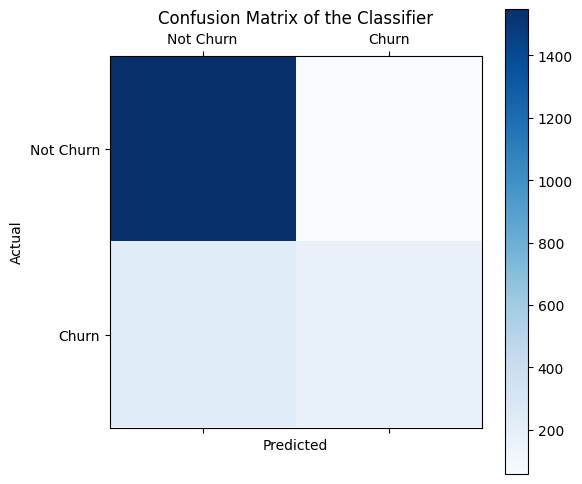

Previous ANN Accuracy: 85.00%
Difference in Accuracy: 0.75%


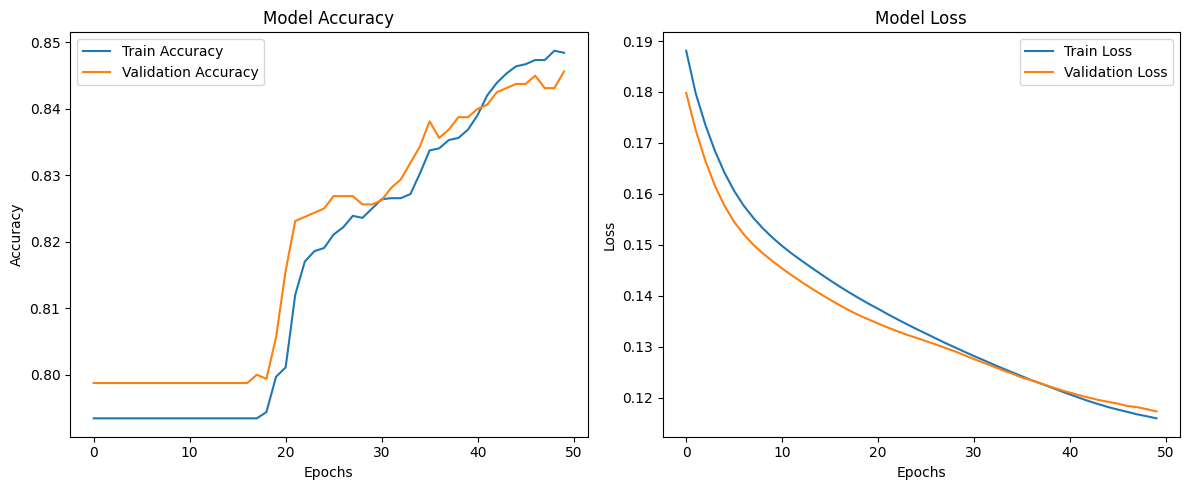

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD


df = pd.read_csv("/content/sample_data/Churn_Modelling.csv")

print("\nAfter Dropping Unnecessary Columns\n")
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
print(df.head())

df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = Sequential()
classifier.add(Dense(units=6, activation='relu', input_dim=X_train.shape[1]))
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

learning_rate = 0.01
optimizer = SGD(learning_rate=learning_rate)
classifier.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

batch_size = 16
epochs = 50
history = classifier.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

y_pred = classifier.predict(X_test)
y_pred_binary = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred_binary)
accuracy = (cm[0, 0] + cm[1, 1]) / len(y_test) * 100

print("\n\t\tConfusion Matrix:\n", cm)
print("\n\t\tAccuracy of ANN with new hyperparameters: {:.2f}%".format(accuracy))

print("\n\t\tClassification Report:\n")
print(classification_report(y_test, y_pred_binary, target_names=['Not Churn', 'Churn']))

plt.figure(figsize=(6, 6))
plt.matshow(cm, cmap='Blues', fignum=1)
plt.title('Confusion Matrix of the Classifier')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0, 1], labels=['Not Churn', 'Churn'])
plt.yticks(ticks=[0, 1], labels=['Not Churn', 'Churn'])
plt.show()

previous_accuracy = 85
print("Previous ANN Accuracy: {:.2f}%".format(previous_accuracy))
print("Difference in Accuracy: {:.2f}%".format(accuracy - previous_accuracy))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
